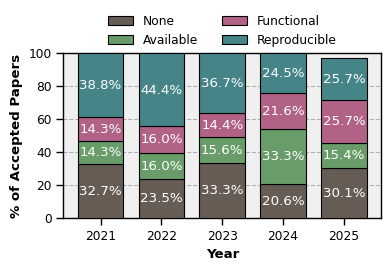

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

COLORS = ["#665c54", "#689d6a", "#b16286", "#458588"] # from gruvbox
FACECOLOR = "#f0f0f0"

with sns.plotting_context("paper", font_scale=1.0):

    # Data
    years        = ["2021", "2022", "2023", "2024", "2025"]
    
        # cumulative sum of badges
    none = [32, 19, 30, 21, 41]
    accepted = [98, 81, 90, 102, 136] 
    cumm_available = [66, 62, 60, 81, 91]
    cumm_functional = [52, 49, 46, 47, 70]
    reproducible = [38, 36, 33, 25, 35]

    available = [cumm_available[i] - cumm_functional[i] for i in range(len(years))]
    functional = [cumm_functional[i] - reproducible[i] for i in range(len(years))]
    

    # none         = [32, 19, 30, 21, 41]
    # available    = [14, 13, 14, 9, 25]
    # functional   = [14, 13, 13, 47, 35]
    # reproducible = [38, 36, 33, 25, 35]
    # accepted     = [98, 81, 90, 102, 136]

    # Normalize the data to percentages.
    normalize_fn = lambda data: [
        datum / denom * 100 for datum, denom in zip(data, accepted)
    ]
    none_pct = normalize_fn(none)
    available_pct = normalize_fn(available)
    functional_pct = normalize_fn(functional)
    reproducible_pct = normalize_fn(reproducible)

    # Stacking order: bottom to top.
    ind = np.arange(len(years))
    color_iter = iter(COLORS)
    bar_kwargs = {
        "zorder": 3,
        "edgecolor": "black",
        "width": 0.75,
    }

    # Plotting the data.
    fig, ax = plt.subplots(figsize=(4, 3))

    p1 = ax.bar(
        ind,
        none_pct,
        label="None",
        color=next(color_iter),
        **bar_kwargs,
    )

    p2 = ax.bar(
        ind,
        available_pct,
        bottom=none_pct,
        label="Available",
        color=next(color_iter),
        **bar_kwargs,
    )
    bottom2 = [i + j for i, j in zip(none_pct, available_pct)]

    p3 = ax.bar(
        ind,
        functional_pct,
        bottom=bottom2,
        label="Functional",
        color=next(color_iter),
        **bar_kwargs,
    )
    bottom3 = [i + j for i, j in zip(bottom2, functional_pct)]

    p4 = ax.bar(
        ind,
        reproducible_pct,
        bottom=bottom3,
        label="Reproducible",
        color=next(color_iter),
        **bar_kwargs,
    )

    # Axes labels, ticks, and style.
    ax.set_ylabel("% of Accepted Papers", weight="bold")
    ax.set_xlabel("Year", weight="bold")
    ax.set_xticks(ind)
    ax.set_xticklabels(years)
    ax.set_ylim(0, 100)
    ax.legend(
        loc="upper center",
        ncol=2,
        bbox_to_anchor=(0.5, 1.3),
        frameon=False,
    )

    for container in ax.containers:
        ax.bar_label(
            container,
            fmt="%0.1f%%",
            color="white",
            label_type="center",
        )

    ax.set_facecolor(FACECOLOR)

    plt.grid(axis="y", linestyle="--", zorder=0)
    plt.tight_layout()
    plt.savefig("sc_badges_stacked.pdf", format="pdf", bbox_inches="tight")
    plt.show()
